## Одномерная акустика без матриц

In [1]:
import numpy as np
from matplotlib import pyplot as plt

rho0 = 0.25
c0=2
h=0.05
Cu=1
dt = Cu*h/c0

ul,pl = 1,5
ur,pr = 0,2

x = np.arange(-2-h,2+h,h)
u = np.zeros_like(x)
p = u.copy()

In [2]:
def get_BV(ul,ur,pl,pr):
    global rho0, c0
    U = (ul+ur)/2 - 0.5*(pr-pl)/(rho0*c0)
    P = (pl+pr)/2 - 0.5*(ur-ul)*(rho0*c0)
    return U,P

In [3]:
left = np.where(x<=0)
right = np.where(x>0)

In [4]:
u[left], p[left] = ul,pl
u[right], p[right] = ur,pr

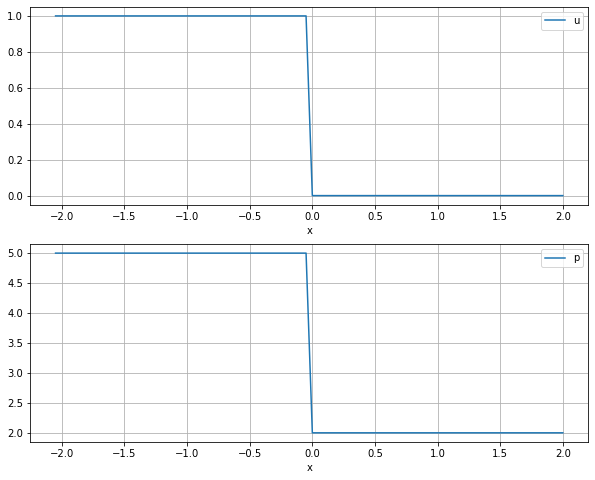

In [5]:
fix,axs = plt.subplots(2,1,figsize=(10,8))

axs[0].plot(x,u, label='u')
axs[1].plot(x,p,label='p')
axs[0].set_label('u')
axs[1].set_label('p')

for ax in axs:
    ax.set_xlabel('x')
    ax.legend()
    
    ax.grid(True)

In [6]:
get_BV(u[:-1],u[1:],p[:-1],p[1:])
print()

In [7]:
def godunov(u,p,nt,dt,dx):
    global rho0,c0
    un = np.zeros((nt,len(u)))
    pn = np.zeros((nt,len(p)))
    
    un[0,:] = u.copy()
    pn[0,:] = p.copy()    
    
    for t in range(1, nt):
        U,P = get_BV(u[:-1],u[1:],p[:-1],p[1:])
        
        un[t,1:-1] = u[1:-1] - dt/dx*(P[1:]-P[:-1])/rho0
        pn[t,1:-1] = p[1:-1] - dt/dx*rho0*c0**2*(U[1:]-U[:-1])
        
        un[t,0], un[t,-1] = u[0],u[-1]
        pn[t,0], pn[t,-1] = p[0],p[-1]
        
        u = un[t].copy()
        p = pn[t].copy()
        
    return un,pn

In [8]:
nt = 25
un,pn = godunov(u,p,nt,dt,h)

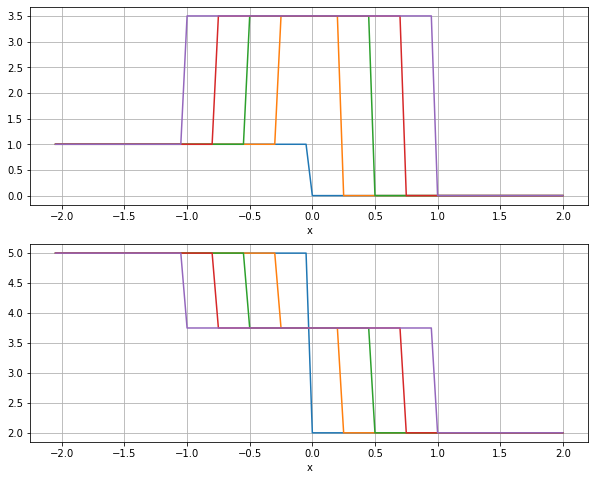

In [9]:
fix,axs = plt.subplots(2,1,figsize=(10,8))

for step in (0,5,10,15,20):
    axs[0].plot(x,un[step], label='u')
    axs[1].plot(x,pn[step],label='p')
    
axs[0].set_label('u')
axs[1].set_label('p')

for ax in axs:
    ax.set_xlabel('x')
    ax.grid(True)

## Одномерная акустика с матрицами

In [112]:
Cu=1.0
rho_0=0.25
c_0=2
h=0.05
dt=Cu*h/c_0

x = np.arange(-2,2+h,h)
A = np.array([(0, 1/rho0),(rho0*c0**2, 0)])
C0 = np.array([(c0, 0), (0, c0)])

In [113]:
def godunov_matrix(u,p,nt,dt,dx):
    global A, C0
    x = np.arange(-2, 2+h, h)
    u = np.zeros_like(x)
    p = np.zeros_like(x)

    ul, pl = 1, 5
    ur, pr = 0, 2
    
    left=np.where(x<=0)
    right=np.where(x>0)
    u[left], p[left] = ul, pl
    u[right], p[right] = ur, pr
    
    U = np.array([u, p])
    
    un = np.zeros((nt,len(u)))
    pn = np.zeros((nt,len(p)))
    Un = np.array([un,pn])
    
    Un[:,0,:] = U.copy()
    
    for t in range(1, nt):
        F = 0.5 * (A @ U[:,:-1] + A @ U[:,1:]) - \
        0.5* C0 @ (U[:,1:]-U[:,:-1])
        
        Un[:,t,1:-1] = U[:,1:-1]-dt/dx*(F[:,1:]-F[:,:-1])
        
        Un[:,t,0]=U[:,0]
        Un[:,t,-1]=U[:,-1]
    
        U = Un[:,t,:].copy()
        
    return Un

In [114]:
nt = 25
Un = godunov_matrix(u,p,nt,dt,h)

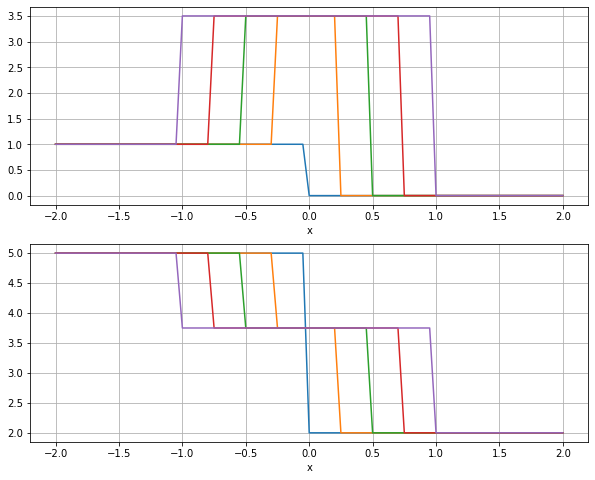

In [115]:
fix,axs = plt.subplots(2,1,figsize=(10,8))

for step in (0,5,10,15,20):
    axs[0].plot(x,Un[0,step], label='u')
    axs[1].plot(x,Un[1,step],label='p')
    
axs[0].set_label('u')
axs[1].set_label('p')

for ax in axs:
    ax.set_xlabel('x')
    ax.grid(True)